## Grating

- Fraunhofer Diffraction Patterns for grating

In [1]:
import numpy as np
from diffractio import mm, um, degrees
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY


# Setting up
length = 1 * mm
num_data = 512
x0 = np.linspace(-length / 2, length / 2, num_data)
y0 = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.633 * um

number of processors: 12


## Setting up source(s)
- Gaussian Beam (LASER)
* Experiments
    - Plane Wave
    - Spherical Wave (Only affects filtering)

((<matplotlib.image.AxesImage at 0x1d60b35da60>,
  <matplotlib.image.AxesImage at 0x1d60b5fd220>),
 None,
 None)

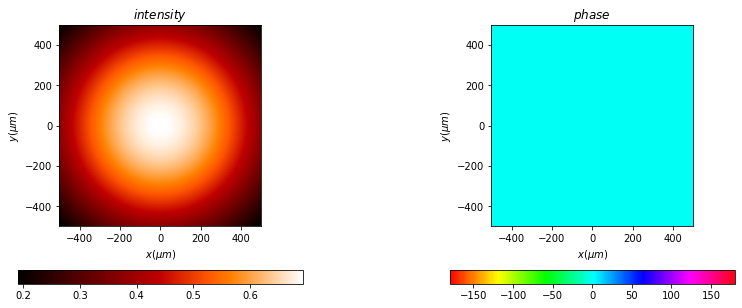

In [2]:
# Gaussian Beam Source - like a LASER
u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u0.gauss_beam(r0=(0, 0), w0=(800 * um, 800 * um), z0=0.0)
u0.draw(kind='field', logarithm=True)

In [3]:
# # Plane Wave Source - an experiment
# u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
# u1.plane_wave()
# u1.draw(kind='field', logarithm=True)

## Grating

((<matplotlib.image.AxesImage at 0x1d60be320d0>,
  <matplotlib.image.AxesImage at 0x1d60c091850>),
 None,
 None)

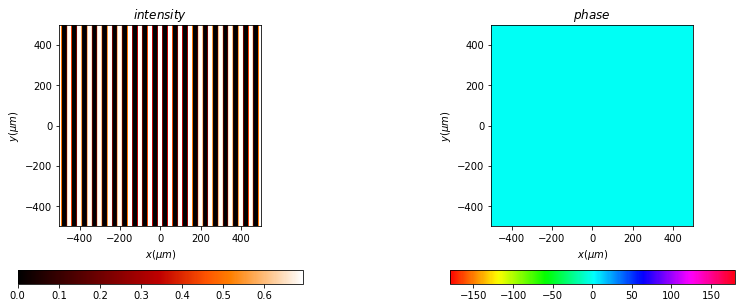

In [4]:
grating = Scalar_mask_XY(x0, y0, wavelength)
grating.ronchi_grating(
    period=50 * um,
)

grating.draw(kind='field', logarithm=True)

((<matplotlib.image.AxesImage at 0x1d60c12ffd0>,
  <matplotlib.image.AxesImage at 0x1d60c3f67c0>),
 None,
 None)

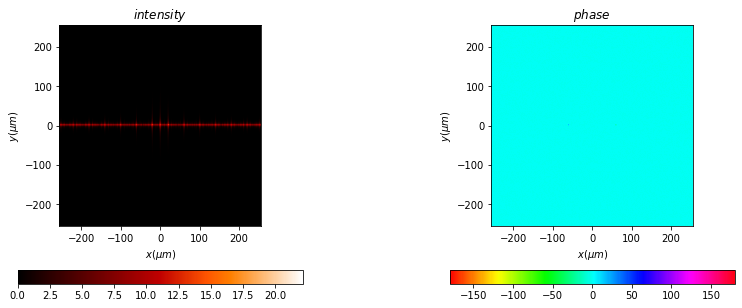

In [6]:
# Fourier Plane - No Filter
a_L1 = (u0 * grating).fft(z=1 * mm, new_field=True)
a_L1.draw(kind='field', logarithm=True)

((<matplotlib.image.AxesImage at 0x1d60c4ff4f0>,
  <matplotlib.image.AxesImage at 0x1d60c54bd90>),
 None,
 None)

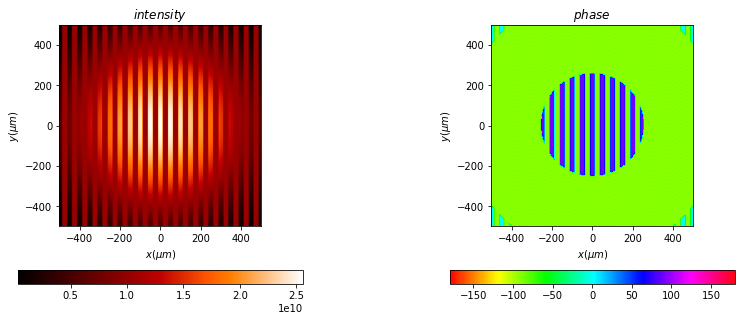

In [7]:
a_L2 = a_L1.fft(z=1 * mm, shift=False, remove0=False, new_field=True)
a_L2.draw(kind='field', logarithm=False)